In [1]:
def Phi1(T,AF,Q,Delta,lambda_J): 
  
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82)
    Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82)
    Regime = Regime2(Q);
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    Jump1 = Jump_Merton(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82,0.05,0.086,lambda_J)
    Jump2 = Jump_Merton(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82,0.05,0.086,0)
    #####################################################################################
    # ###############################Numerical Integration########################
    n = 10 # time step of integration
    X = np.linspace(T-Delta,T,n+1)
    phi1_1_2j = [];phi1_1_1j = [];phi1_1_0j = [];
    phi1_2_2j = [];phi1_2_1j = [];phi1_2_0j = []; 
    
    for i in range(len(X)):
        x1 = Jump1.L(-2j,X[i]); x2=Jump1.L(-1j,X[i]);x3=Jump1.L(0,X[i]);
        phi1_1_2j.append(x1); phi1_1_1j.append(x2); phi1_1_0j.append(x3);
        y1 = Jump2.L(-2j,X[i]); y2=Jump2.L(-1j,X[i]);y3=Jump2.L(0,X[i]);
        phi1_2_2j.append(y1); phi1_2_1j.append(y2);phi1_2_0j.append(y3); 
        
        
    phI1_1_2j = np.trapz(phi1_1_2j,dx=Delta/n);phI1_2_2j = np.trapz(phi1_2_2j,dx=Delta/n);
    phI1_1_1j = np.trapz(phi1_1_1j,dx=Delta/n);phI1_2_1j = np.trapz(phi1_2_1j,dx=Delta/n);
    phI1_1_0j = np.trapz(phi1_1_0j,dx=Delta/n);phI1_2_0j = np.trapz(phi1_2_0j,dx=Delta/n);
  
    #################################Diagonal Matrix#########################################
    phi1_Matrix_2j = np.diag(np.array([phI1_1_2j,phI1_2_2j]));
    phi1_Matrix_1j = np.diag(np.array([phI1_1_1j,phI1_2_1j]));
    phi1_Matrix_0j = np.diag(np.array([phI1_1_0j,phI1_2_0j]));
    
    #######################Phi1_characteristic function#####################################
    Phi1_2j = Regime.character(phi1_Matrix_2j,T-Delta,T);
    Phi1_1j = Regime.character(phi1_Matrix_1j,T-Delta,T);
    Phi1_0j = Regime.character(phi1_Matrix_0j,T-Delta,T);
    return Phi1_2j, Phi1_1j, Phi1_0j

In [2]:
def Phi2(T,AF,Q,Delta):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    #
    Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82)# S0, y0, AF, r, sigma, a, b, N, rho
    Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82)
    Regime = Regime2(Q);
    #
    ###############################################################################
    
    n = 10 # time step of integration
    X = np.linspace(0,T-Delta,n+1)
    phi2_1_2j = [];phi2_2_2j = [];
    
    for i in range(len(X)):
        H1 = Stock1.H(X[i]);H2 = Stock2.H(X[i]);
        x = Stock1.a*Stock1.b*H1;y = Stock2.a*Stock2.b*H2;
        phi2_1_2j.append(x);phi2_2_2j.append(y);
        #print(H1,X[i],T-Delta)
        
    phI2_1_2j = np.trapz(phi2_1_2j,dx=(T-Delta)/n);phI2_2_2j = np.trapz(phi2_2_2j,dx=(T-Delta)/n);
    phi2_Matrix = np.diag(np.array([phI2_1_2j,phI2_2_2j]))
    Phi2 = Regime.character(phi2_Matrix,0,T-Delta)
    return Phi2,Stock1.H(0)

In [3]:
# def discreet(AF,lambda_J):
    
#     Q = np.array([[-0.1,0.1],[0.4,-0.4]])
#     Regime = Regime2(Q);
#     Kvar = []
#     U = np.array([0,0])#initialize
#     T = 1
    
    
#     for t in AF:
#         Delta = 1/t
#         for k in range(0,t*T):
#             t_k = (k+1)*Delta
#             Stock1 = Stock(100,0.087**2,t,0.06,0.14,3.46,0.006704,t_k,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
#             Stock2 = Stock(100,0.087**2,t,0.03,0.14,3.46,0.002852,t_k,-0.82)
#             Jump1 = Jump_Merton(100,0.087**2,t,0.06,0.14,3.46,0.006704,t_k,-0.82,0.05,0.086,0.)
#             Jump2 = Jump_Merton(100,0.087**2,t,0.03,0.14,3.46,0.002852,t_k,-0.82,0.06,0.086,lambda_J)
#             R = np.diag([np.exp(Stock1.r*Delta),np.exp(Stock2.r*Delta)])# matrix of interest rate
#             Phi1_2j,Phi1_1j,Phi1_0j = Phi1(t_k,t,Q,Delta,lambda_J) 
#             Phi2_,H1 = Phi2(t_k,t,Q,Delta)
#             if t_k == Delta:
#                 M = Stock1.M(-2j,0)
#                 uk = Phi1_2j[1]*np.exp(M*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
#                 Uk = uk
#             else:
#                 uk = np.multiply(Phi1_2j[1],Phi2_[1])*np.exp(H1*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
#                 Uk = uk
            
#             U = U+Uk
#             K = (U/T)*10000
            
#         Kvar.append(K)
     
#     return Kvar


In [4]:
def discreet(AF,Lambda):
    
    
    Kvar = []
    
    for t in AF:
        K = regime_VS(t,Lambda)
        Kvar.append(K)
     
    return(Kvar)


In [5]:
def regime_VS(AF,Lambda):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
   
    Delta = 1/AF
    Q = np.array([[-0.1,0.1],[0.4,-0.4]])#transition matrix
    #Stock1 = Stock(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
    #Stock2 = Stock(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82)
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    #Jump1 = Jump_Merton(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82,0.05,0.086,0.)
    #Jump2 = Jump_Merton(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82,0.06,0.086,0.3)
    Regime = Regime2(Q);
    ################################################################################
    
    U = np.array([0,0])#initialize
    T = 1
    for k in range(0,AF*T):
        t_k = (k+1)*Delta
        Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,t_k,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
        Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82)
        Jump1 = Jump_Merton(100,0.087**2,AF,0.06,0.14,3.46,0.006704,t_k,-0.82,0.05,0.086,lambda_J)
        Jump2 = Jump_Merton(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82,0.05,0.086,0.)
        R = np.diag([np.exp(Stock1.r*Delta),np.exp(Stock2.r*Delta)])# matrix of interest rate
        Phi1_2j,Phi1_1j,Phi1_0j = Phi1(t_k,AF,Q,Delta,Lambda) 
        Phi2_,H1 = Phi2(t_k,AF,Q,Delta)
        if t_k == Delta:
            M = Stock1.M(-2j,0)
            uk = Phi1_2j[1]*np.exp(M*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
        else:
            uk = np.multiply(Phi1_2j[1],Phi2_[1])*np.exp(H1*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
            
        U = U+Uk
        
        
        
       
    K = (U/T)*10000
    return K

In [6]:

def Continuous(lambda_J):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    
    Stock1 = Stock(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
    Stock2 = Stock(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82)
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    Jump1 = Jump_Merton(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82,0.05,0.086,0.)
    Jump2 = Jump_Merton(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82,0.06,0.086,lambda_J)
    Q = np.array([[-0.1,0.1],[0.4,-0.4]])
    Regime = Regime2(Q);T=1;


    n = 10 # time step of integration
    X = np.linspace(0,1,n+1)
    Phi_Matrix=[]
    E = np.ones(Q.ndim)                     
    for i in range(len(X)):
        v1 = Stock1.mean(X[i]);v2 = Stock2.mean(X[i])
        phi = np.diag(np.array([v1,v2]))
        pphi = np.matmul(linalg.expm(Q.transpose()*(X[i])),phi)
        Phi = np.matmul(E,pphi)
        Phi_Matrix.append(Phi)
        #print(Phi)
        
    
    a = list(zip(*Phi_Matrix))
    #print(a)
    V1 = np.trapz(a,dx=0.1);
    j1 = Jump1.mean_com(); j2 = Jump2.mean_com();
    V2 = np.diag(np.array([j1,j2]));
    J = np.matmul(linalg.expm(Q.transpose()*T),V2);
    Kvar = ((1-np.exp(-Stock1.a))/Stock1.a)*Stock1.y0+Stock1.a*V1+np.matmul(E,J);
    #print(Stock1.a*V1)


    return(Kvar*10000)

<Figure size 432x288 with 0 Axes>

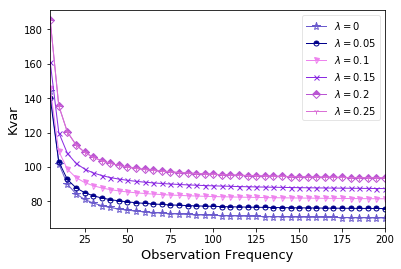

In [9]:
# final main()
from VS_class2 import Stock, Regime2, Jump_Merton, Jump_Kou
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import linalg

AF = range(5,201,5)
X = np.linspace(5,200,40)
lambda_J = np.array([0.0,0.05,0.1,0.15,0.2,0.25])
K = []
# calculate discrete sols based AF
for k in lambda_J:
    Kvar_d = discreet(AF,k)
    K_d = list(zip(*Kvar_d))
    K.append(K_d[0])


# calculate continuous sols and copy to len(AF)
# K = Continuous()
# Kvar_c =  [K[:] for i in range(len(AF))]
# K_c = list(zip(*Kvar_c))
# graph and compare discrete and continuous sols
fig = plt.figure()  # an empty figure with no axes

fig, ax = plt.subplots(1)
ax.plot(X, K[0], color='slateblue', marker='*', fillstyle='top',\
          linestyle='solid', linewidth=1,ms=8,label='$\lambda=0$')
# #ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, K[1], color='darkblue', marker='o', fillstyle='top',linestyle='solid', \
         linewidth=1,ms=5,label='$\lambda=0.05$')
# #ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, K[2], color='violet', marker='v', fillstyle='top',linestyle='solid', \
         linewidth=1,ms=5,label='$\lambda=0.1$')
ax.plot(X, K[3], color='blueviolet', marker='x', fillstyle='top',linestyle='solid', \
         linewidth=1,ms=5,label='$\lambda=0.15$')
ax.plot(X, K[4], color='mediumorchid', marker='D', fillstyle='top',linestyle='solid', \
         linewidth=1,ms=5,label='$\lambda=0.2$')
ax.plot(X, K[4], color='orchid', marker='1', fillstyle='top',linestyle='solid', \
         linewidth=1,ms=5,label='$\lambda=0.25$')
# #ax.plot(X, K_c[1], color='cyan',label='Continuous Kvar without jump')
ax.set_xlim(5, 200)
plt.xlabel('Observation Frequency',fontsize=13)
plt.ylabel('Kvar',fontsize=13)
ax.legend(fancybox=True, framealpha=0.5)

# plt.title("Simple Plot")

plt.savefig('Compare_jump.pdf', format='pdf', dpi=1000)

# Outfile=open('Kvar2.txt','a+')
# Outfile.write(str(K_d))
# Outfile.close()